# 2 Data wrangling

### 2.1 Problem Statement<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties, boasted by resorts (*at the resorts).* 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

In [77]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 2.2 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [78]:
# the supplied CSV data file is the raw_data directory
ski_data = pd.read_csv('raw_data/ski_resort_data.csv')

In [79]:
#Call the info method on ski_data to see a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

`AdultWeekday` is the price of an adult weekday ticket. `AdultWeekend` is the price of an adult weekend ticket. The other columns are potential features.

In [80]:

ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## 2.3 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.3.1 Finding the Big Mountain Resort<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [81]:

ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


### 2.3.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

In [82]:
#finding the percentage of missing values in each column
missing=pd.DataFrame(ski_data.isnull().sum().sort_values(ascending=False)/len(ski_data),columns = ['percent'])
pos = missing['percent'] > 0
missing[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


`fastEight` has the most missing values, at just over 50%. Unfortunately, we see we're also missing quite a few of your desired target quantity, the ticket price, which is missing 15-16% of values. `AdultWeekday` is missing in a few more records than `AdultWeekend`. 

### 2.3.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [83]:
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


Name, Region and State are our categorical variables

#### 2.3.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [84]:

ski_data['Name'].value_counts().head()

Crystal Mountain     2
Thunder Ridge        1
Bradford Ski Area    1
Powder Mountain      1
Bear Mountain        1
Name: Name, dtype: int64

Crystal Mountain is our duplicated resort name.

**Q: 1** Is this resort duplicated if you take into account Region and/or state as well?

In [85]:

#Concatenating the string columns 'Name' and 'Region' and counting the values again 
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Mt. Baldy, Sierra Nevada                    1
Woods Valley Ski Area, New York             1
Cataloochee Ski Area, North Carolina        1
Eagle Point, Utah                           1
Solitude Mountain Resort, Salt Lake City    1
dtype: int64

In [86]:

#Concatenating 'Name' and 'state' and counting the values again 
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Brandywine, Ohio                    1
Wilmot Mountain, Wisconsin          1
Dodge Ridge, California             1
Soldier Mountain Ski Area, Idaho    1
Labrador Mt., New York              1
dtype: int64

Crystal Mountain Resort enry isn't duplicate because they are present in different state/region.

In [87]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


#### 2.3.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

The relationship between region and state:

In [88]:

#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).count()

330

In [89]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Ohio                    5
Connecticut             5
Virginia                4
Mt. Hood                4
Illinois                4
West Virginia           4
Alaska                  3
Iowa                    3
Indiana                 2
New Jersey              2
South Dakota            2
Nevada                  2
Arizona                 2
Missouri                2
Tennessee               1
Northern California     1
Maryland                1
Rhode Island            1
Name: Region

In [90]:

(ski_data[ski_data.Region != ski_data.state]
 .groupby('state')['Region']
 .value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.3.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [91]:

#Select the 'Region' and 'state' columns from ski_data and use the `nunique` method to calculate
#the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.3.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

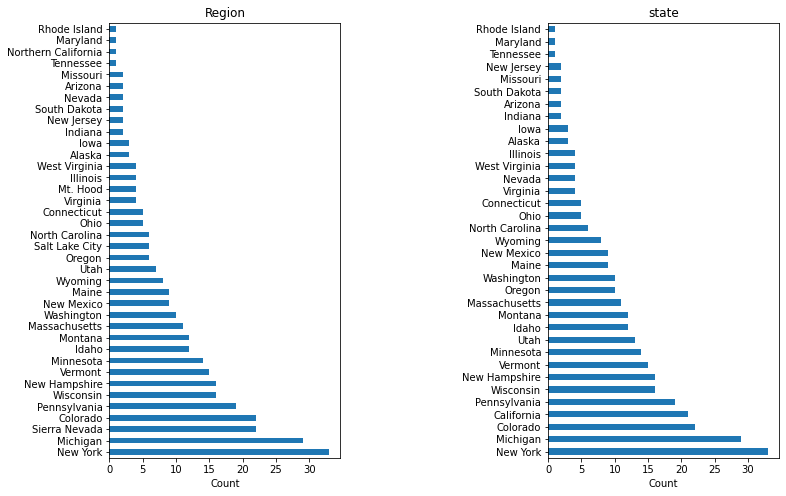

In [92]:

fig, ax = plt.subplots(1, 2, figsize=(12,8))
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.9);


#### 2.3.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

##### 2.3.3.5.1 Average weekend and weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [93]:
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


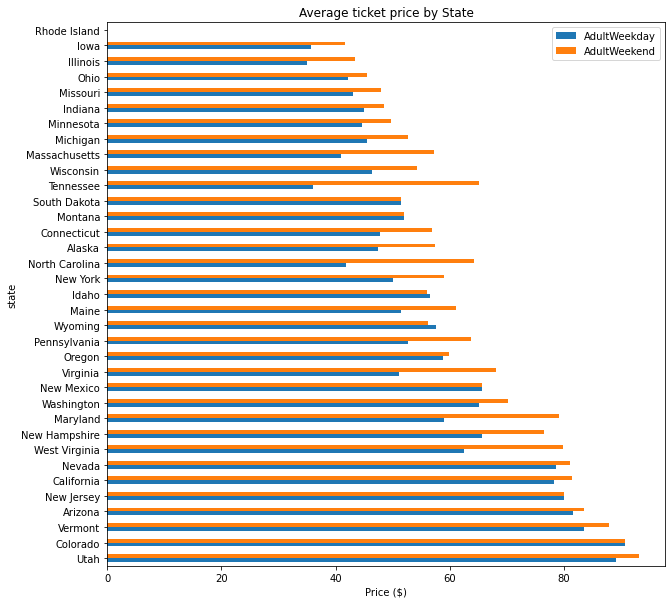

In [94]:

(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

##### 2.3.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

In [95]:

ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday','AdultWeekend'], 
                        value_name='Price')

In [96]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


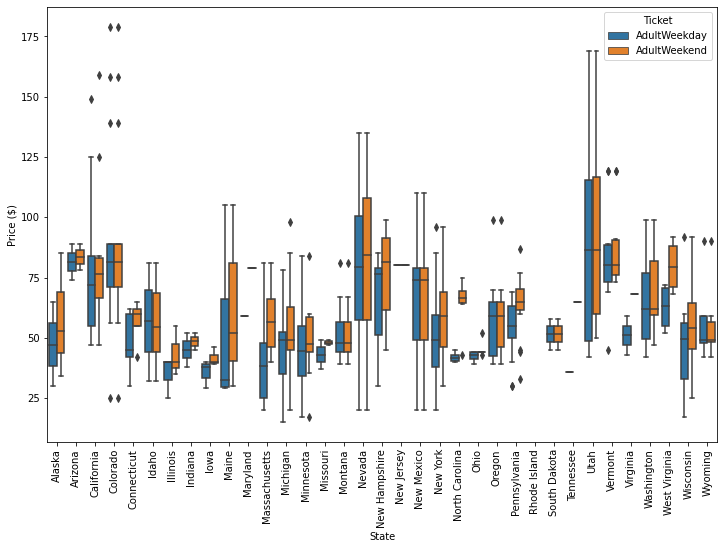

In [97]:

plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices.

* disregard State completely
* retain all State information
* retain State in the form of Montana vs not Montana, as our target resort is in Montana

You've also noted another effect above: some States show a marked difference between weekday and weekend ticket prices. It may make sense to allow a model to take into account not just State but also weekend vs weekday.

### 2.3.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [98]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


Recall you're missing the ticket prices for some 16% of resorts. This is a fundamental problem that means you simply lack the required data for those resorts and will have to drop those records. But you may have a weekend price and not a weekday price, or vice versa. You want to keep any price you have.

In [99]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. We will definitely want to drop the records for which we have no price information, however we will not do so just yet. There may still be useful information about the distributions of other features in that 14% of the data.

#### 2.3.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

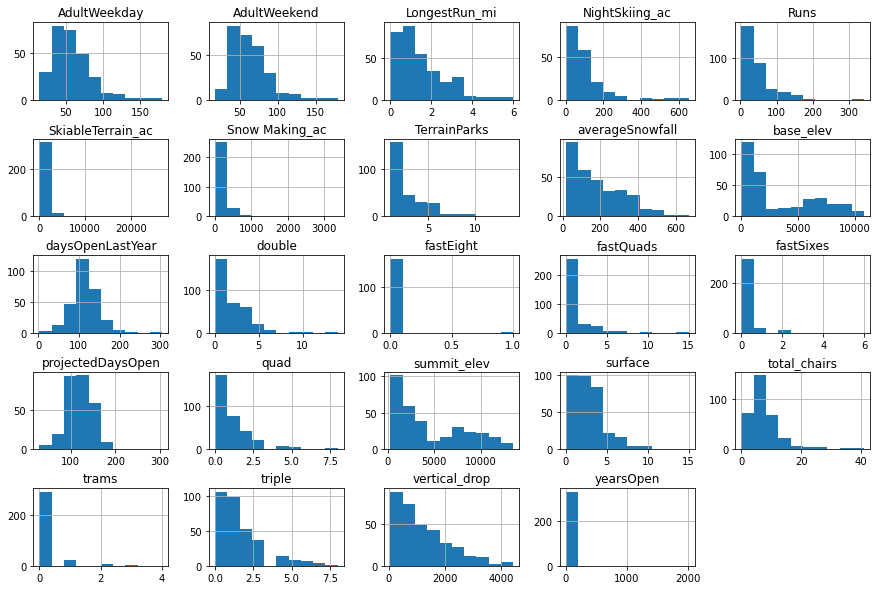

In [100]:

ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);



* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

##### 2.3.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [101]:
#Filtering the 'SkiableTerrain_ac' column to print the values greater than 10000
is_there=ski_data['SkiableTerrain_ac']>10000
ski_data_available=ski_data[is_there]
ski_data_available

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


Silverton Mountain has a large Skiable Terrain

In [102]:

ski_data_available.T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0
fastSixes,0
fastQuads,0


![Silverton Mountain information](images/silverton_mountain_info.png)

In [103]:

ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [104]:

#Using the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [105]:
#Use the .loc accessor a final time to verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

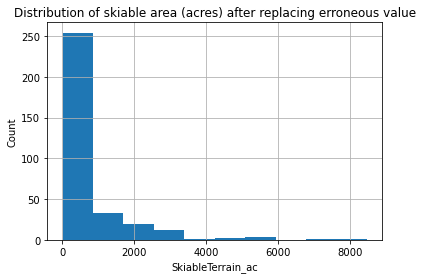

In [106]:
ski_data.SkiableTerrain_ac.hist()
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

##### 2.3.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [107]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [108]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0
fastSixes,2
fastQuads,7


What, then, is your rough guess for the area covered by snowmaking?

In [109]:
.6 * 4800

2880.0

##### 2.3.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [110]:
ski_data.fastEight.value_counts()
#ski_data

0.0    163
1.0      1
Name: fastEight, dtype: int64

We will drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [111]:
#Drop the 'fastEight' column from ski_data. Use inplace=True
ski_data.drop(columns="fastEight", inplace=True)

In [112]:

#Filter the 'yearsOpen' column for values greater than 100
ski_data.filter(ski_data['yearsOpen'] > 100)

""
0
1
2
3
4
...
325
326
327
328


In [113]:

ski_data.yearsOpen


0      60.0
1      44.0
2      36.0
3      81.0
4      49.0
       ... 
325     9.0
326    81.0
327    80.0
328    59.0
329    81.0
Name: yearsOpen, Length: 330, dtype: float64

In [114]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

The smallest number of years open otherwise is 6. You can't be sure whether this resort in question has been open zero years or one year and even whether the numbers are projections or actual. In any case, you would be adding a new youngest resort so it feels best to simply drop this row.

In [115]:
ski_data = ski_data[ski_data.yearsOpen < 1000]

## 2.4 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

Calculating summary statistics for differences in resorts.

 Features we are interested in are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac



In [116]:

state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'),
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.5 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

In [117]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.317073
2    14.329268
1     3.353659
dtype: float64

About 14% of the rows have no price data. As the price is our target, these rows are of no use and then we can drop them.

In [118]:
ski_data = ski_data[missing_price != 2]

## 2.6 Review distributions<a id='2.9_Review_distributions'></a>

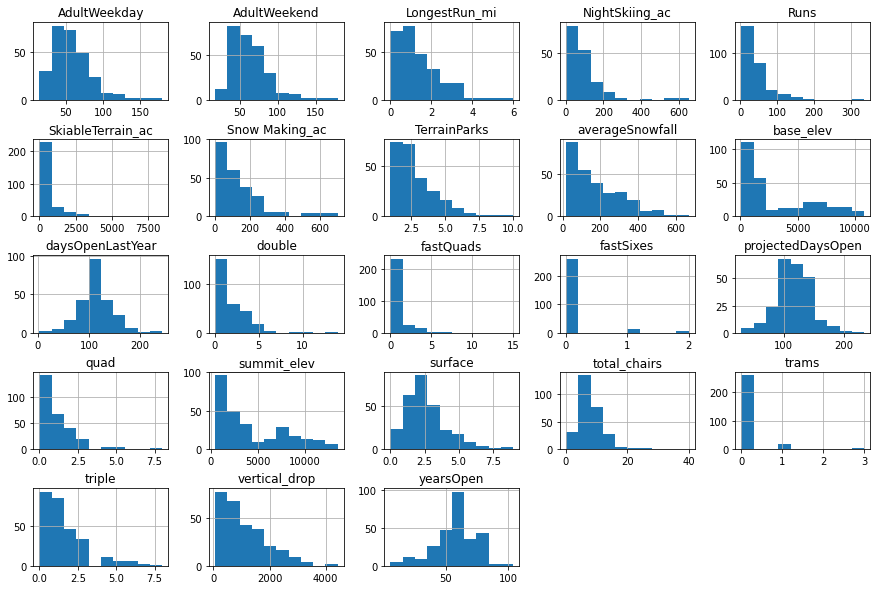

In [119]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 2.7 Population data<a id='2.10_Population_data'></a>

In [120]:
#Using pandas' `read_html` method to read the table from Wikipedia
states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states'
usa_states = pd.read_html(states_url)

In [121]:
type(usa_states)

list

In [122]:
len(usa_states)

1

In [123]:
usa_states = usa_states[0]
usa_states.head()


Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[upper-alpha 1] Population[upper-alpha 2][3] Total area[4]  \
  Established[upper-alpha 1] Population[upper-alpha 2][3]           mi2   
0               Dec 14, 1819                      4903185         52420   
1                Jan 3, 1959                       731545        665384   
2               Feb 14, 1912                      7278717        113990   
3               Jun 15, 1836                      3017804         53179   
4                Sep 9, 1850                     39512223        163695   

           Land area[4]          Water area[4]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [124]:

established=usa_states.iloc[:,4 ]

In [125]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[upper-alpha 1], Established[upp

In [126]:

usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [127]:

missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [128]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[upper-alpha 3]
37     Pennsylvania[upper-alpha 3]
38     Rhode Island[upper-alpha 4]
45         Virginia[upper-alpha 3]
47                   West Virginia
Name: state, dtype: object

In [129]:

usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [130]:

missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

set()

In [75]:

state_summary = state_summary.merge(usa_states_sub, how = 'left',on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population_x,state_area_sq_miles_x,state_population_y,state_area_sq_miles_y
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543,3565278,5543


## 2.8 Target Feature<a id='2.11_Target_Feature'></a>

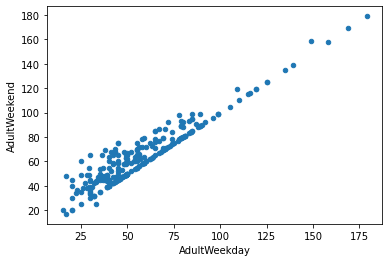

In [131]:

ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

In [132]:
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [133]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [134]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [135]:
ski_data.shape

(277, 25)

### 2.8.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

In [136]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


These seem possibly curiously quantized...

In [137]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [138]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [103]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

## 2.9 Save data<a id='2.12_Save_data'></a>

In [139]:
ski_data.shape

(277, 25)

In [140]:
datapath = 'data'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [141]:
datapath_skidata = os.path.join(datapath, 'ski_data_cleaned.csv')
if not os.path.exists(datapath_skidata):
    ski_data.to_csv(datapath_skidata, index=False)

In [142]:
datapath_states = os.path.join(datapath, 'state_summary.csv')
if not os.path.exists(datapath_states):
    state_summary.to_csv(datapath_states, index=False)

## 2.10 Summary<a id='2.13_Summary'></a>

 In this entire data wrangling exercise, we firstly identifies our target variables, then proceeded to clean the data. While data cleaning, our major target was to find out what features could be dropped either due to the presence of large number of missing values or due to their irrelevance to our target variables. Another imporatant step was identifying the outliers and dropping those rows, for example we dropped a row where the number of years the ski resort existed had been reported as 2019. The original dataset had 330 rows and 27 columns (or features) but our wrangled dataset has 277 rows and 24 features. Also, we have decided to proceed with AdultWeekend as our target variable because for Big Montana Resort, there isn't a lot of variation between AdultWeekend and AdultWeekday prices and also the former had lesser number of missing values.